# Python Scientifique

In [96]:
# scientific python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# python de base
from datetime import datetime, date, time, timedelta
import statistics as pystat
# import datetime as dt

# my code
from carremagicex import d_ca

## Temporal Data

In [13]:
# maintenant (precision us)
dt = datetime.now()
print(dt)
dt

2022-10-18 09:49:03.254215


datetime.datetime(2022, 10, 18, 9, 49, 3, 254215)

In [14]:
# composante date de l'objet datetime
today1 = dt.date()
today2 = date.today()
print(today1, today2)
today1

2022-10-18 2022-10-18


datetime.date(2022, 10, 18)

In [17]:
print(today1.strftime('%d/%m/%Y'))
print(f"aujourd'hui: {today1:%d/%m/%Y}")

18/10/2022
aujourd'hui: 18/10/2022


In [19]:
dateStrIso = '2020-02-29'
dateStrFr = '29/02/2020'

In [21]:
dateIso = date.fromisoformat(dateStrIso)
dateFr = datetime.strptime(dateStrFr, '%d/%m/%Y').date()
dateIso, dateFr

(datetime.date(2020, 2, 29), datetime.date(2020, 2, 29))

In [23]:
dateNextYear = dateFr + timedelta(days=365)
dateNextYear

datetime.date(2021, 2, 28)

In [26]:
dt + timedelta(hours=3, seconds=30)

datetime.datetime(2022, 10, 18, 12, 49, 33, 254215)

NB: Pour des calculs sur des mois/années: dateutil.relativedelta

# Numpy
- ndarray: vector, matrice, ..
- statistics

In [63]:
data = [
    3.3, 
    4.4, 
    float('nan'), 
    5.5,
]
data

[3.3, 4.4, nan]

In [29]:
pystat.mean(data)

nan

In [30]:
np.mean(data)

nan

In [31]:
np.nanmean(data)

4.3999999999999995

In [32]:
data2 = np.random.normal(10, 3, 100000)

In [34]:
np.mean(data2), data2.mean()

(9.9895466127051, 9.9895466127051)

In [35]:
np.std(data2)

2.9880862239717594

In [37]:
med = np.median(data2)
med

9.991129704903917

In [40]:
len(data2[data2 < med]), len(data2[data2 > med])

(50000, 50000)

## surcharge des operateurs sur un ndarray

In [41]:
# call ndarray.__add__ : OK
data2 + 1

array([10.67625456,  8.11718148, 11.03845251, ..., 11.22198027,
       13.92185856, 10.48546365])

In [44]:
# call int.__add__ : NotImplemented
# call ndarray.__radd__ : OK
1 + data2

array([10.67625456,  8.11718148, 11.03845251, ..., 11.22198027,
       13.92185856, 10.48546365])

In [45]:
data2 + data2

array([19.35250912, 14.23436295, 20.07690503, ..., 20.44396054,
       25.84371711, 18.97092729])

In [46]:
# ValueError: operands could not be broadcast together with shapes (100000,) (3,)
# data2 + data2[:3]

ValueError: operands could not be broadcast together with shapes (100000,) (3,) 

In [47]:
# inplace add: ndarray.__iadd__
data2[:3] += data2[:3]
data2

array([19.35250912, 14.23436295, 20.07690503, ..., 10.22198027,
       12.92185856,  9.48546365])

In [ ]:
# what is the best choice ?
data2 = data2 + 4 # double the amount in memory
data2 += 4  # best: inplace

In [48]:
data2 > med

array([ True,  True,  True, ...,  True,  True, False])

In [51]:
np.any(data2 > med)

True

In [54]:
np.all(data2 > med), np.all(data2 <= 30)

(False, True)

In [57]:
# surcharge des operateurs bitwise => elementwise
# & : and element wise
# | : or element wise
# ~ : not element wise
data2[(data2 > med) & (data2 < 15)]

array([14.23436295, 10.01502725, 11.82351326, ..., 12.98328771,
       10.22198027, 12.92185856])

In [60]:
p95 = np.percentile(data2, 95)
p95

14.915007012250475

In [61]:
p95bis = np.quantile(data2, .95)
p95bis

14.915007012250475

In [62]:
print(data2.shape)
print(data2.flags)

(100000,)
  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



In [65]:
extractData = data2[::100] # view
extractData.flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [66]:
extractData[1] = 19.9
extractData[1], data2[100]

(19.9, 19.9)

In [67]:
extractDataCopy = extractData.copy()
extractDataCopy.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [68]:
matrice3 = np.random.normal(10, 3, (1000, 1000))
print(matrice3.shape)
print(matrice3.flags)

(1000, 1000)
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



In [69]:
matrice4 = data2.reshape((100,1000))
print(matrice4.shape)
print(matrice4.flags)

(100, 1000)
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



In [70]:
matrice4.T.flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [74]:
# produit matriciel
res = matrice4 @ matrice3
res.shape

(100, 1000)

In [73]:
#ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 100 is different from 1000)
#res2 = matrice3 @ matrice4

res2 = matrice3 @ matrice4.T
res.shape

(100, 1000)

In [75]:
matrice3 * matrice3

array([[ 69.74832712,  47.41348204,  77.96543277, ...,  47.0381554 ,
         55.34920628, 169.83046591],
       [195.08735765,  87.60536897,  60.11880441, ...,  78.63682886,
         27.21011528, 124.04383461],
       [101.64603659, 104.05602831,  46.47459834, ..., 118.25758544,
         16.56493964,  64.08531164],
       ...,
       [ 73.26393081, 224.36954038,  31.66814737, ..., 134.91273113,
         99.42856895, 198.70908929],
       [ 56.7048997 ,  67.09330588,  82.15265641, ...,  40.18448126,
        107.12866948, 101.73769032],
       [ 70.91444523,  79.00288243, 113.97600029, ...,  62.21439282,
        113.55758869, 169.31067438]])

In [77]:
sumsByRow = np.sum(matrice4, axis=1)
print(matrice4.shape, sumsByRow.shape)
sumsByRow

(100, 1000) (100,)


array([10132.29883325,  9881.08944372, 10055.41030762,  9827.42048177,
       10034.75425695, 10014.80150135, 10080.64891816, 10064.0989553 ,
        9863.59569509, 10058.10319192,  9903.38589173,  9873.18032844,
        9948.89266696,  9973.77540993,  9839.81717595,  9883.40421174,
        9959.46721158, 10101.11480146,  9967.3395816 , 10064.0300047 ,
       10043.03928781,  9979.73050619, 10020.07886819, 10029.1188343 ,
        9837.55666718,  9821.96492488, 10059.91563804, 10144.07920313,
        9962.56225916,  9994.15310586,  9955.27000437,  9925.35408548,
       10029.60810557, 10062.37933596, 10017.56958704,  9953.29090123,
        9968.40259101, 10023.9530971 ,  9906.84003909, 10150.42336759,
        9978.24099713, 10010.56821566,  9912.33797366,  9950.52599747,
        9780.44529831, 10066.25569043,  9986.86696693,  9974.3666107 ,
        9954.99745771, 10078.98682521,  9886.90282747,  9900.82612594,
        9803.40463054, 10046.46219141, 10124.94356506, 10130.13056368,
      

In [78]:
sumsByCol = np.sum(matrice4, axis=0)
print(matrice4.shape, sumsByCol.shape)
sumsByCol

(100, 1000) (1000,)


array([ 993.05459276, 1042.82717312,  997.8257574 , 1037.23284694,
        977.19479892,  955.38259515, 1024.39078162,  990.05498522,
        963.136169  ,  963.04109279,  979.87117628, 1002.02742323,
       1037.11520308,  984.45803684,  985.33443454,  988.61583577,
       1047.36351426,  989.6718213 ,  990.06665127,  971.89511076,
        994.16239962, 1049.1013405 , 1000.27023844,  973.71105053,
        938.04098543,  966.71627074,  977.84733171,  992.93105642,
       1054.93525563,  980.59522781, 1028.72113682, 1008.84956549,
       1038.64436534,  988.29692477,  969.93454608,  995.55209958,
       1024.4718258 , 1017.75807724,  980.91902999, 1010.18101743,
       1010.33771614, 1040.54602686,  998.2143306 , 1039.69224108,
       1003.99581382, 1044.96483092, 1040.85834184,  968.88984056,
       1002.68626879, 1013.71117806,  989.1363283 , 1042.71990316,
        957.57343726, 1002.36040816,  947.61654531, 1003.48990582,
       1007.76747158,  972.33321175, 1007.67619786,  993.21030

In [82]:
s1 = np.sum(matrice3, where=matrice3>15)
s2 = np.sum(matrice3)
s3 = np.sum(matrice3, initial=-np.mean(matrice3))
print(s1, s2, s3)

778972.469505454 9997981.546888217 9997971.548906669


In [84]:
m5 = matrice3 - np.mean(matrice3)
print(np.mean(m5))
m5

-2.768523188478866e-16


array([[-1.64643516, -3.1122367 , -1.16817788, ..., -3.13954474,
        -2.55827683,  3.03392031],
       [ 3.96938605, -0.63820757, -2.24434986, ..., -1.13024064,
        -4.78164995,  1.13951524],
       [ 0.08398436,  0.20280412, -3.18075349, ...,  0.87664881,
        -5.92797668, -1.99265135],
       ...,
       [-1.43854635,  4.98098839, -4.37053565, ...,  1.61721243,
        -0.02659403,  4.0984396 ],
       [-2.46771597, -1.80693119, -0.93417129, ..., -3.65885848,
         0.35231649,  0.08852877],
       [-1.57691005, -1.10962498,  0.67797276, ..., -2.11037146,
         0.65835876,  3.01396198]])

### construction
- np.array, empty, ones, zeros, full, eyes, ..

In [85]:
square = np.array([
    [8,1,6],
    [3,5,7], 
    [4,9,2]])

In [86]:
n = square.shape[0]
ms = n*(n**2+1)//2
print(n, ms)

3 15


Exo: calculer les sommes de chaque ligne, colonne, diagonale, diagonale symetrique
et vérifier qu'elles sont égales à ms

In [88]:
isMagic = np.all(square.sum(axis=1) == ms) \
    and np.all(square.sum(axis=0) == ms) \
    and (square.diagonal().sum() == ms) \
    and (square[::-1].diagonal().sum() == ms)
isMagic

True

In [93]:
square5 = np.array([
	[1,	24,	3,	25,	12],
	[16,	7,	21,	6,	15],
	[23,	14,	18,	8,	2],
	[5,		9,	10,	22,	19],
	[20,	11,	13,	4,	17]])

In [100]:
def isMagicSquare(square):
    n,_ = square.shape
    ms = n * (n**2 + 1) // 2
    return np.all(square.sum(axis=1) == ms) \
        and np.all(square.sum(axis=0) == ms) \
        and (square.diagonal().sum() == ms) \
        and (square[::-1].diagonal().sum() == ms)
    

In [104]:
for name1, square1 in d_ca.items():
    ok = isMagicSquare(square1)
    print(name1, ok, sep=": ")

ca3: True
ca3_no_diag: False
ca3_no_lig: False
ca3_no_col: False
ca3_no_lig_diag: False
ca4_ok: True
albrecht_durer: True
josep_maria_subirachs: False
ca_5_semi_diabolik: True
benjamin_franklin: False
general_cazalas: True
willem_barink_8: True
willem_barink_12: True


In [112]:
np.where(matrice3>18)
np.where(matrice3>18, matrice3, 0)
np.argwhere(matrice3>18)
np.tile(5, np.repeat(3,4))
np.arange(0, 2*np.pi, np.pi/1000)
np.linspace(0, 2*np.pi, 1000)
np.geomspace(1,2**30, num=31)
np.logspace(1, 1000000, 7) # tofix

array([[  0, 371],
       [  0, 426],
       [  0, 715],
       ...,
       [998, 769],
       [999, 190],
       [999, 661]], dtype=int64)

In [130]:
np.any(matrice3>18)

True

In [133]:
valuesAbove18 = matrice3[matrice3>18]
valuesAbove18

array([20.94218154, 18.18462997, 18.13855589, ..., 18.98018027,
       18.41441267, 18.06697771])

In [135]:
x, y = np.where(matrice3>18)
x, y 

(array([  0,   0,   0, ..., 998, 999, 999], dtype=int64),
 array([371, 426, 715, ..., 769, 190, 661], dtype=int64))

In [137]:
matrice3[0,371]

20.9421815405546

In [139]:
xyArray = np.argwhere(matrice3>18)
xyArray

array([[  0, 371],
       [  0, 426],
       [  0, 715],
       ...,
       [998, 769],
       [999, 190],
       [999, 661]], dtype=int64)

In [141]:
res = np.where(matrice3>18, matrice3, matrice3*1.1 + 2)
res

array([[11.18670103,  9.57431933, 11.71278403, ...,  9.54428049,
        10.18367519, 16.33509204],
       [17.36410436, 12.29575138, 10.52899486, ..., 11.754515  ,
         7.73796475, 14.25124646],
       [13.0901625 , 13.22086424,  9.49895086, ..., 13.96209339,
         6.47700536, 10.80586322],
       ...,
       [11.41537871, 18.47686693,  8.19019049, ..., 14.77671338,
        12.96852627, 17.50606327],
       [10.28329214, 11.01015539, 11.97019129, ...,  8.97303537,
        13.38532784, 13.09516135],
       [11.26317865, 11.77719222, 13.74354973, ..., 10.67637109,
        13.72197434, 16.31313788]])

In [142]:
matrice3[0,0] * 1.1 + 2

11.186701029808956

In [143]:
# entiers, python, lazy
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [145]:
# entiers, numpy => ndarray
np.arange(1,100,10)

array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])

In [147]:
# bad idea
x = np.arange(0, 2*np.pi, 0.5)
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ])

In [151]:
x = np.linspace(0, 2 * np.pi, 1000)
print(len(x))
print(x[0], x[-1])
y = np.sin(x)
z = np.cos(x)

1000
0.0 6.283185307179586


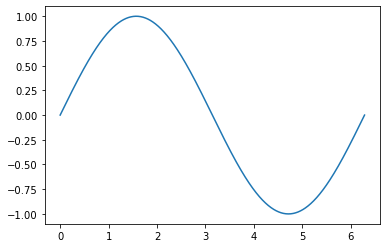

In [152]:
plt.plot(x,y)

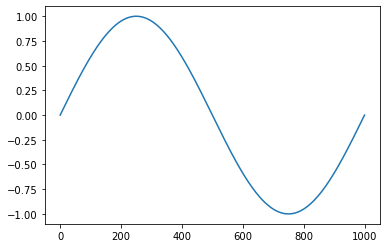

In [154]:
plt.plot(y)

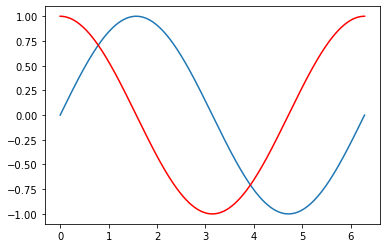

In [159]:
l1, l2 = plt.plot(x, y, x, z, 'r')
[l1, l2]

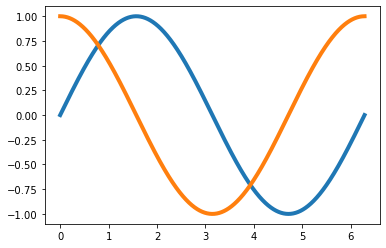

In [167]:
# plt.plot(x,y, toto='red')
l1,l2 = plt.plot(x, y, x, z, linewidth=4)
l1.label1 = 'sin'
l2.label2 = 'cos'

Text(0.5, 0.98, 'Courbes trigo')

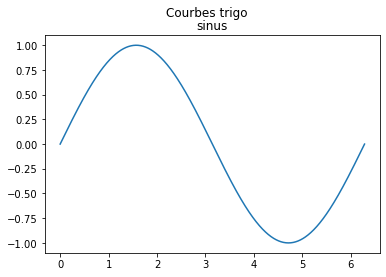

In [190]:
fig, ax = plt.subplots()
l, = ax.plot(x,y)
ax.set_title('sinus')
fig.suptitle("Courbes trigo")

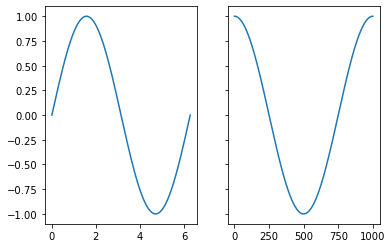

In [188]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
ax1.plot(x,y)
ax2.plot(z)

Text(0, 0.5, '10*cos')

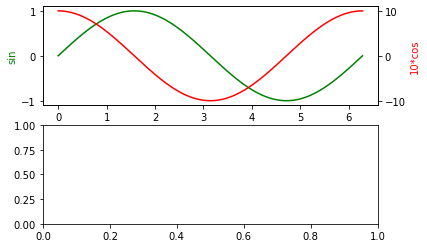

In [195]:
fig, ((ax1, ax2)) = plt.subplots(2,1)

ax1.plot(x,y, 'g')
ax1.set_ylabel('sin', color='green')

ax1clone = ax1.twinx()
ax1clone.plot(x,10*z,'r')
ax1clone.set_ylabel('10*cos', color='red')

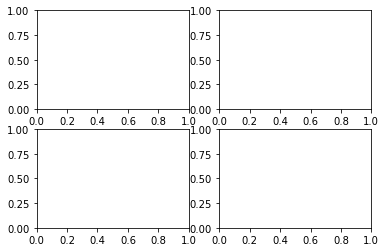

In [185]:
fig, ((ax11, ax12),(ax21, ax22)) = plt.subplots(2,2)